In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv('bank-full.csv', sep=';')

## Data Exploration

In [38]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [39]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<Axes: xlabel='y', ylabel='count'>

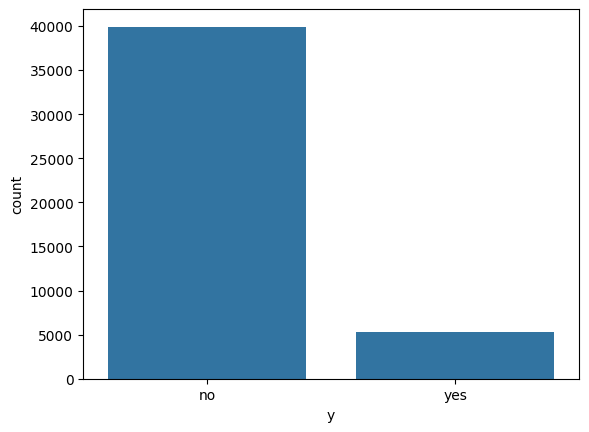

In [41]:
sns.countplot(x="y", data=data)

In [42]:
categorical_cols = data.select_dtypes(include="object").columns.to_list()
numerical_cols = data.select_dtypes(exclude="object").columns.to_list()
print(categorical_cols)
print(numerical_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [43]:
print(data.job.unique())
print(data.marital.unique())
print(data.education.unique())
print(data.default.unique())
print(data.housing.unique())
print(data.loan.unique())
print(data.contact.unique())
print(data.month.unique())
print(data.poutcome.unique())
print(data.y.unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


In [44]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [45]:
from sklearn.preprocessing import OrdinalEncoder

['blue-collar', 'entrepreneur', 'housemaid', 'services', 'technician', 'unknown', 'self-employed', 'admin.', 'management', 'unemployed', 'retired', 'student']


Text(0.5, 1.0, 'Proportion of subcsriptions against job')

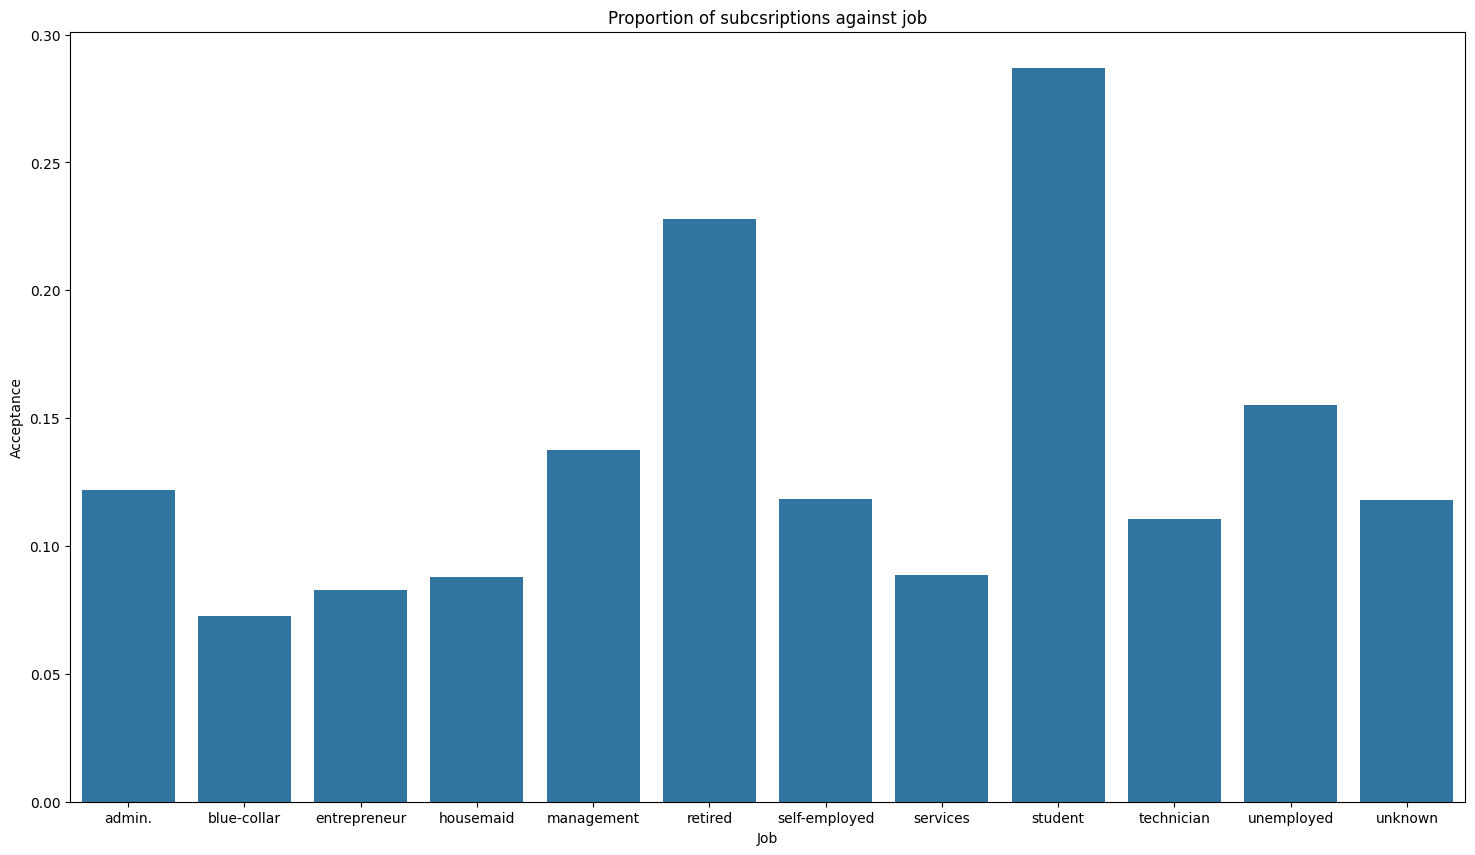

In [47]:
plt.figure(figsize=(18, 10))
prop_df = data.groupby("job")["y"].mean().reset_index()
sns.barplot(x="job", y="y", data=prop_df)
prop_df = prop_df.sort_values(by="y")
ordered_categories = prop_df['job'].tolist()
print(ordered_categories)
job_encoder = OrdinalEncoder(categories=[ordered_categories])
plt.xlabel("Job")
plt.ylabel("Acceptance")
plt.title("Proportion of subcsriptions against job")

['married', 'divorced', 'single']


Text(0.5, 1.0, 'Proportion of subscriptions against marital')

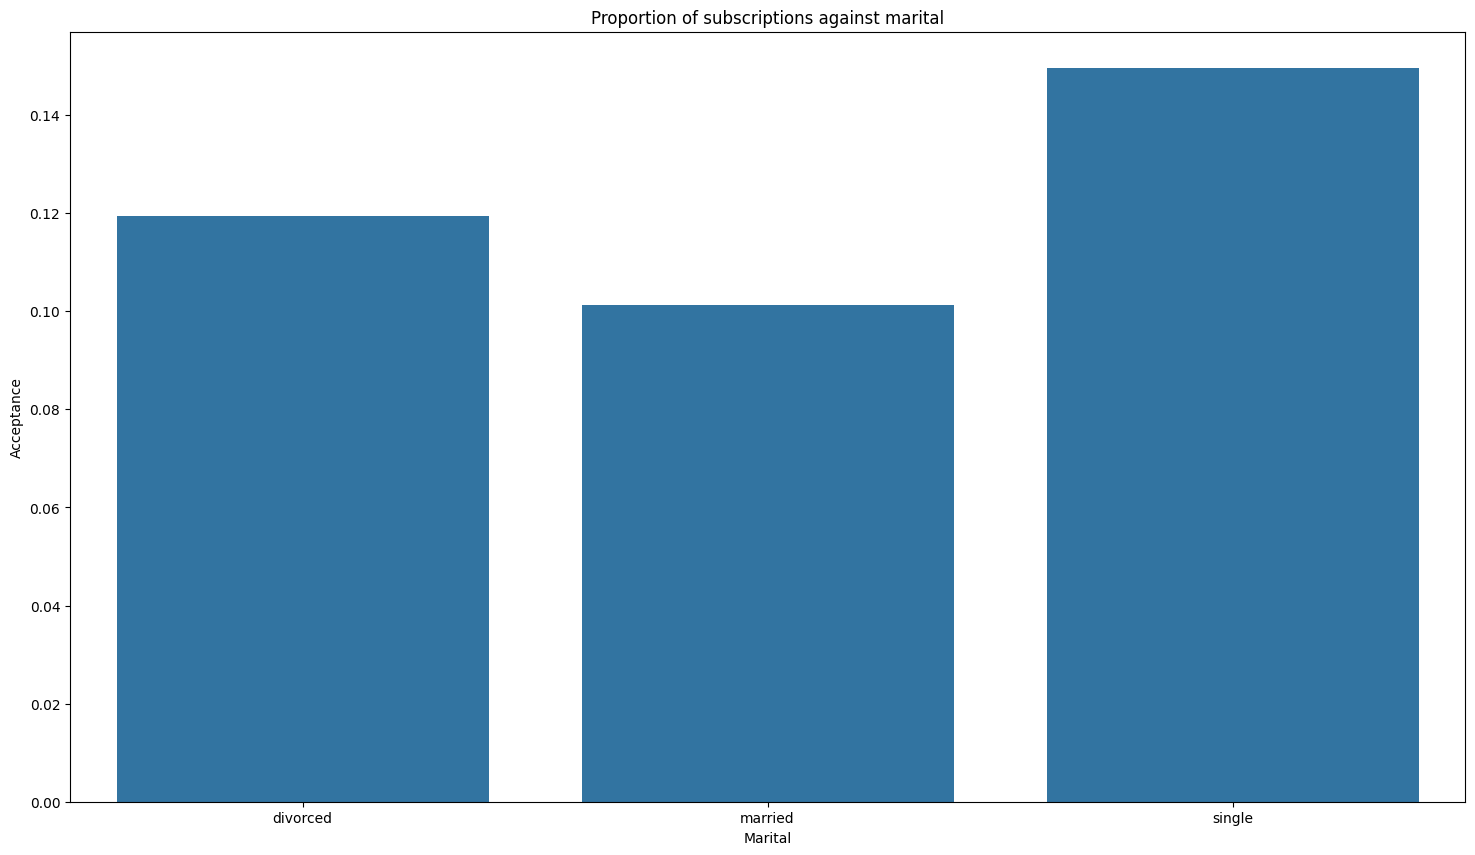

In [48]:
plt.figure(figsize=(18, 10))
prop_df = data.groupby("marital")["y"].mean().reset_index()
sns.barplot(x="marital", y="y", data=prop_df)
prop_df = prop_df.sort_values(by="y")
ordered_categories = prop_df['marital'].tolist()
print(ordered_categories)
marital_encoder = OrdinalEncoder(categories=[ordered_categories])
plt.xlabel("Marital")
plt.ylabel("Acceptance")
plt.title("Proportion of subscriptions against marital")

['primary', 'secondary', 'unknown', 'tertiary']


Text(0.5, 1.0, 'Proportion of subsriptions against education')

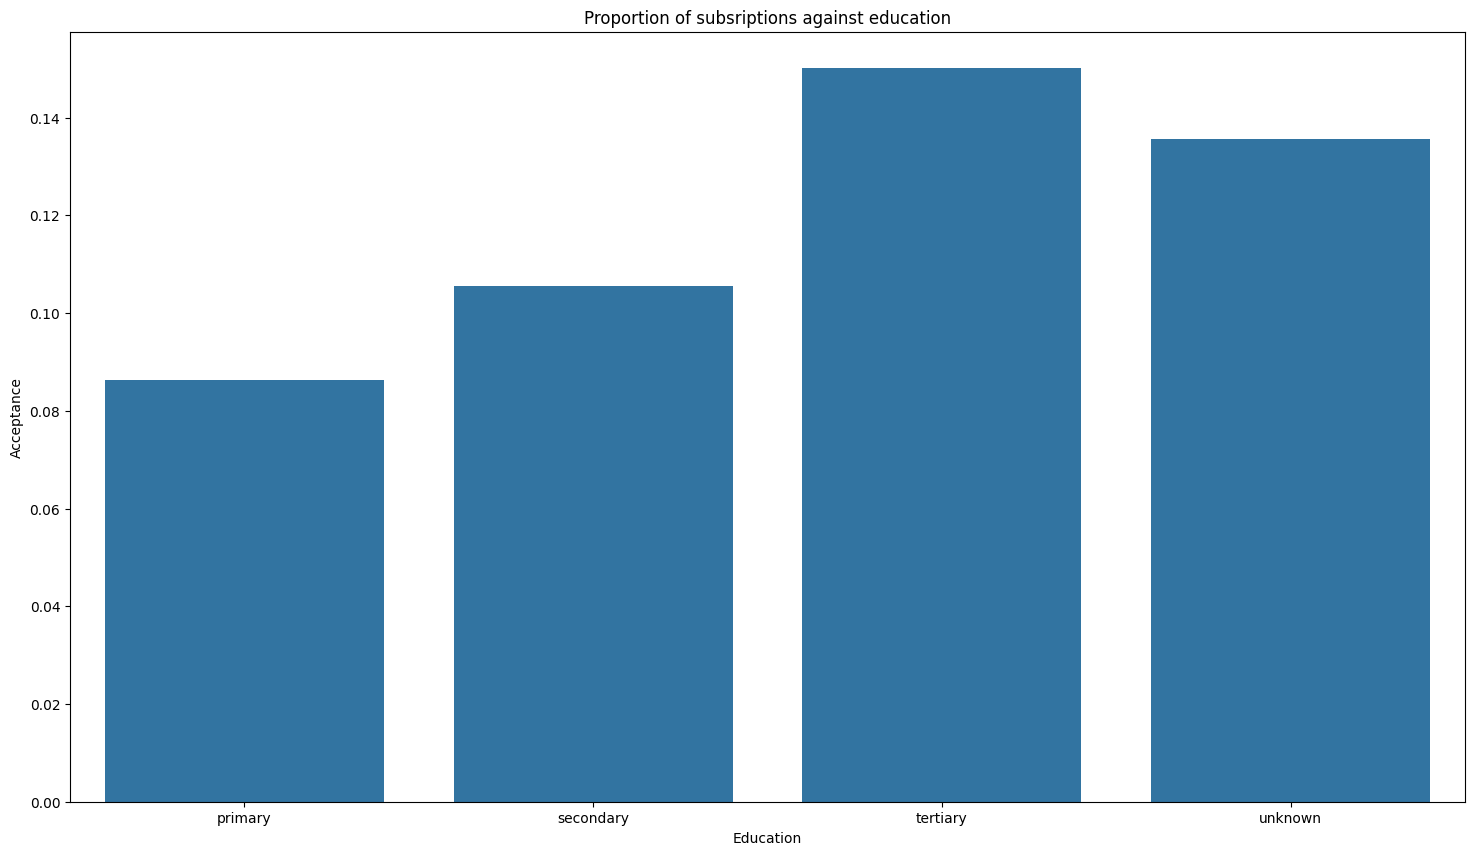

In [49]:
plt.figure(figsize=(18, 10))
prop_df = data.groupby("education")["y"].mean().reset_index()
sns.barplot(x="education", y="y", data=prop_df)
prop_df = prop_df.sort_values(by="y")
ordered_categories = prop_df['education'].tolist()
print(ordered_categories)
education_encoder = OrdinalEncoder(categories=[ordered_categories])
plt.xlabel("Education")
plt.ylabel("Acceptance")
plt.title("Proportion of subsriptions against education")

['unknown', 'telephone', 'cellular']


Text(0.5, 1.0, 'Proportion of subscriptions against contact type')

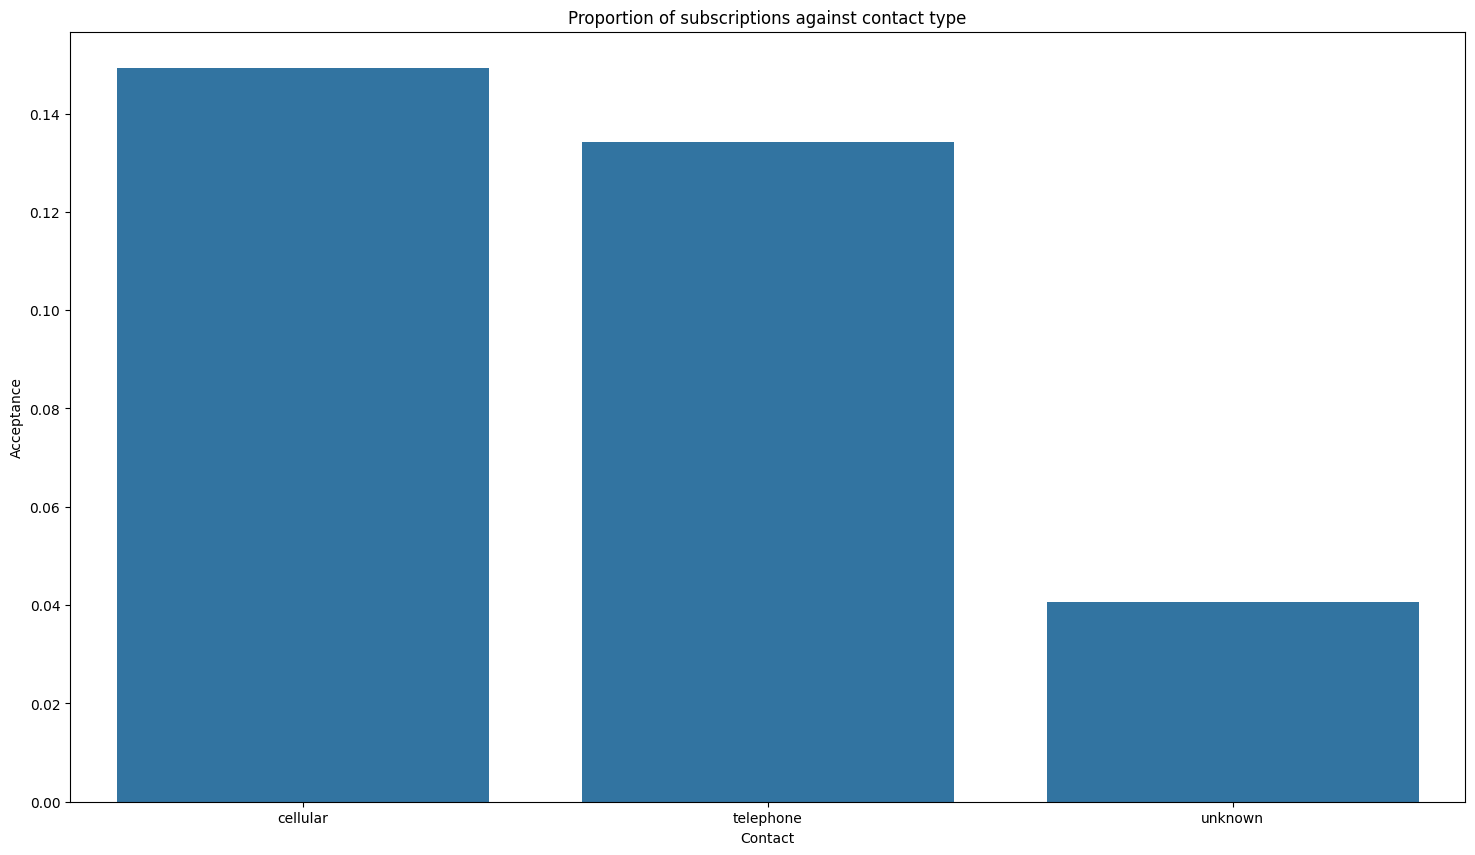

In [50]:
plt.figure(figsize=(18, 10))
prop_df = data.groupby("contact")["y"].mean().reset_index()
sns.barplot(x="contact", y="y", data=prop_df)
prop_df = prop_df.sort_values(by="y")
ordered_categories = prop_df['contact'].tolist()
print(ordered_categories)
contact_encoder = OrdinalEncoder(categories=[ordered_categories])
plt.xlabel("Contact")
plt.ylabel("Acceptance")
plt.title("Proportion of subscriptions against contact type")

['may', 'jul', 'jan', 'nov', 'jun', 'aug', 'feb', 'apr', 'oct', 'sep', 'dec', 'mar']


Text(0.5, 1.0, 'Proportion of subscriptions against the month')

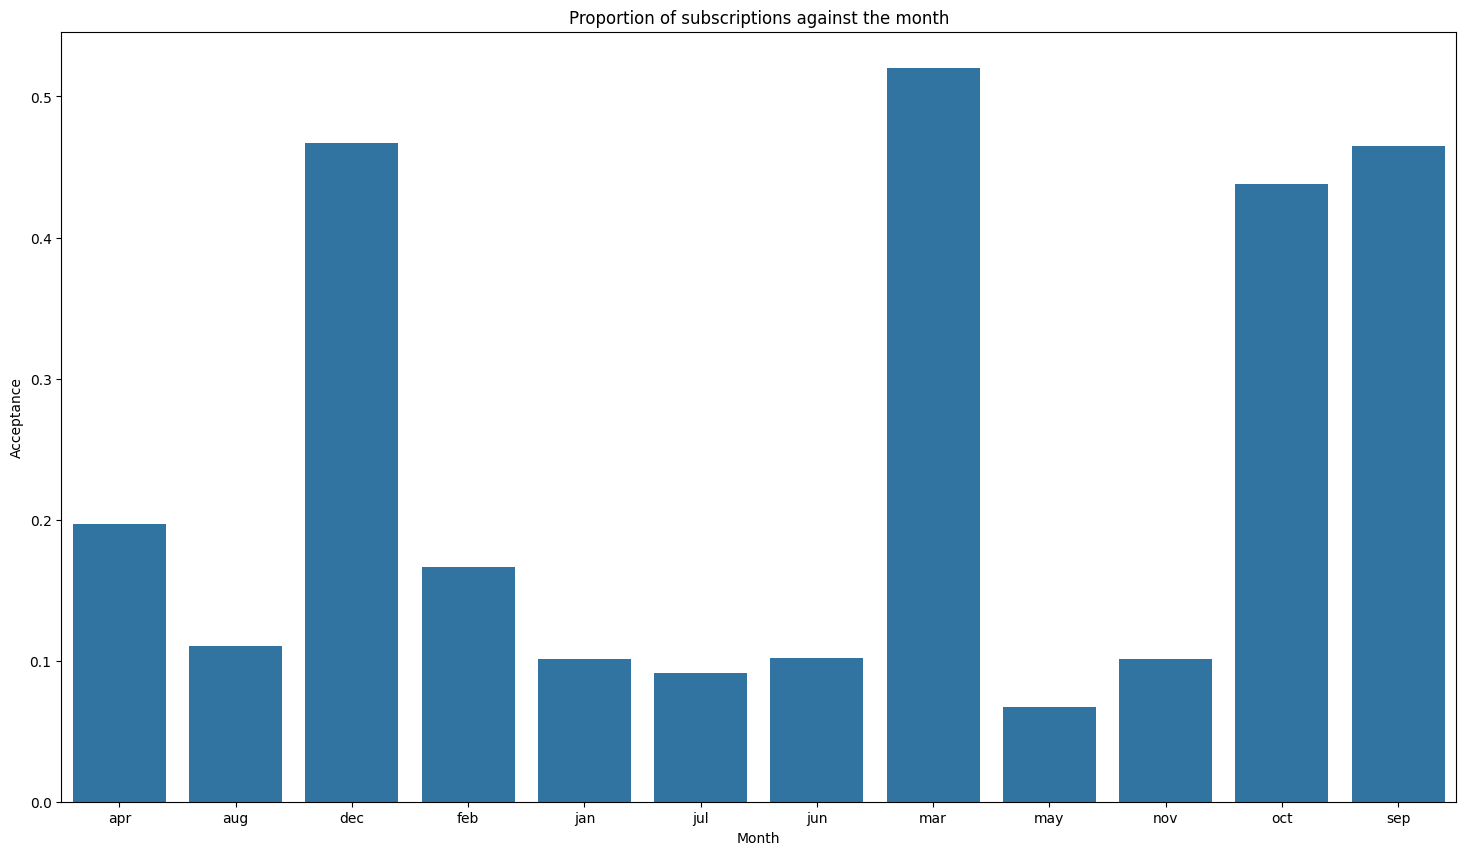

In [51]:
plt.figure(figsize=(18, 10))
prop_df = data.groupby("month")["y"].mean().reset_index()
sns.barplot(x="month", y="y", data=prop_df)
prop_df = prop_df.sort_values(by="y")
ordered_categories = prop_df['month'].tolist()
print(ordered_categories)
month_encoder = OrdinalEncoder(categories=[ordered_categories])
plt.xlabel("Month")
plt.ylabel("Acceptance")
plt.title("Proportion of subscriptions against the month")

['unknown', 'failure', 'other', 'success']


Text(0.5, 1.0, 'Proportion of subscriptions against poutcome')

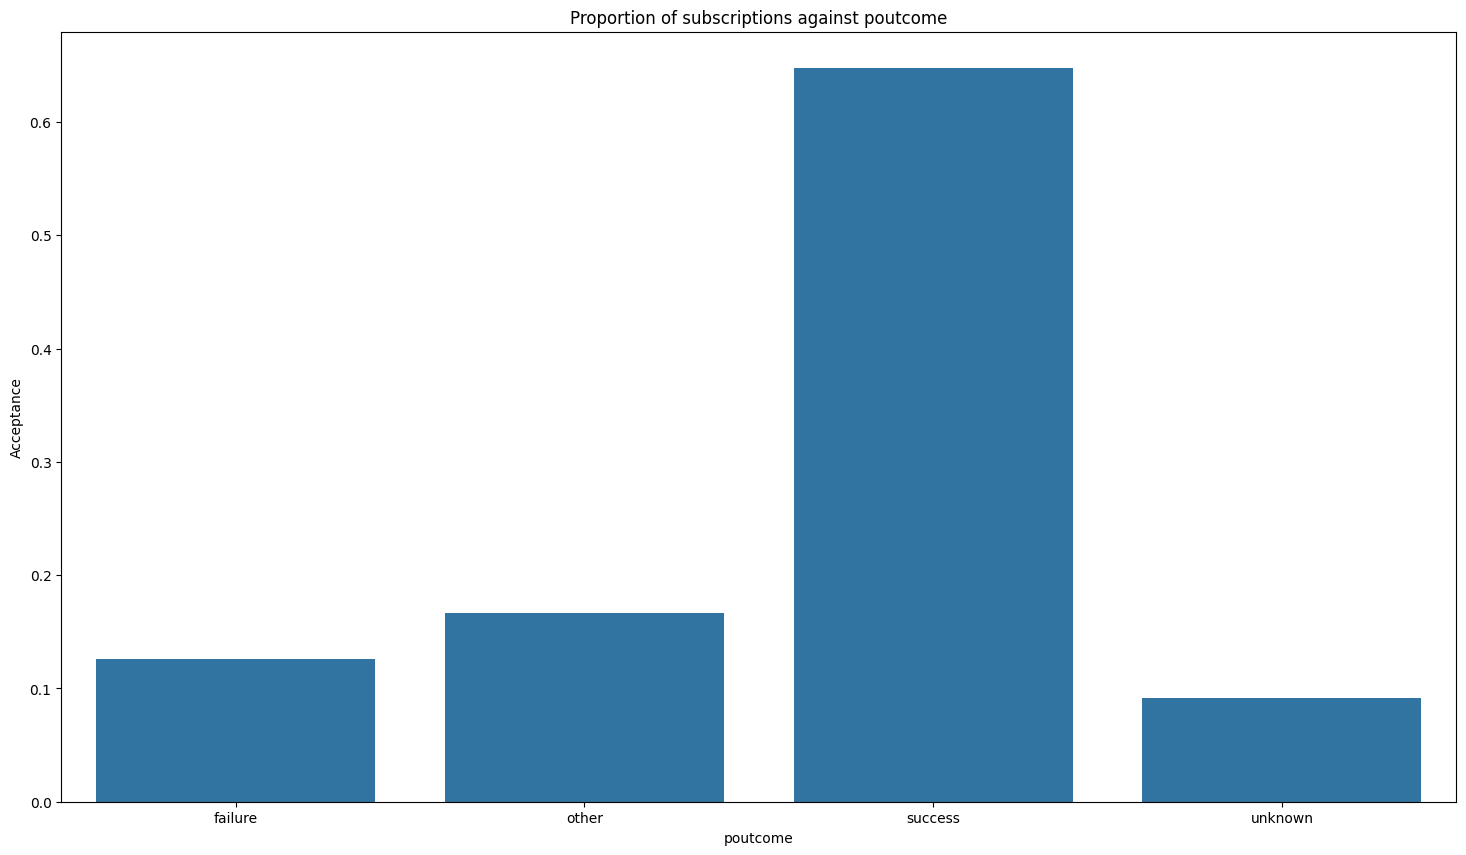

In [52]:
plt.figure(figsize=(18, 10))
prop_df = data.groupby("poutcome")["y"].mean().reset_index()
sns.barplot(x="poutcome", y="y", data=prop_df)
prop_df = prop_df.sort_values(by="y")
ordered_categories = prop_df['poutcome'].tolist()
print(ordered_categories)
poutcome_encoder = OrdinalEncoder(categories=[ordered_categories])
plt.xlabel("poutcome")
plt.ylabel("Acceptance")
plt.title("Proportion of subscriptions against poutcome")

In [53]:
print(data.default.unique())
print(data.housing.unique())
print(data.loan.unique())

['no' 'yes']
['yes' 'no']
['no' 'yes']


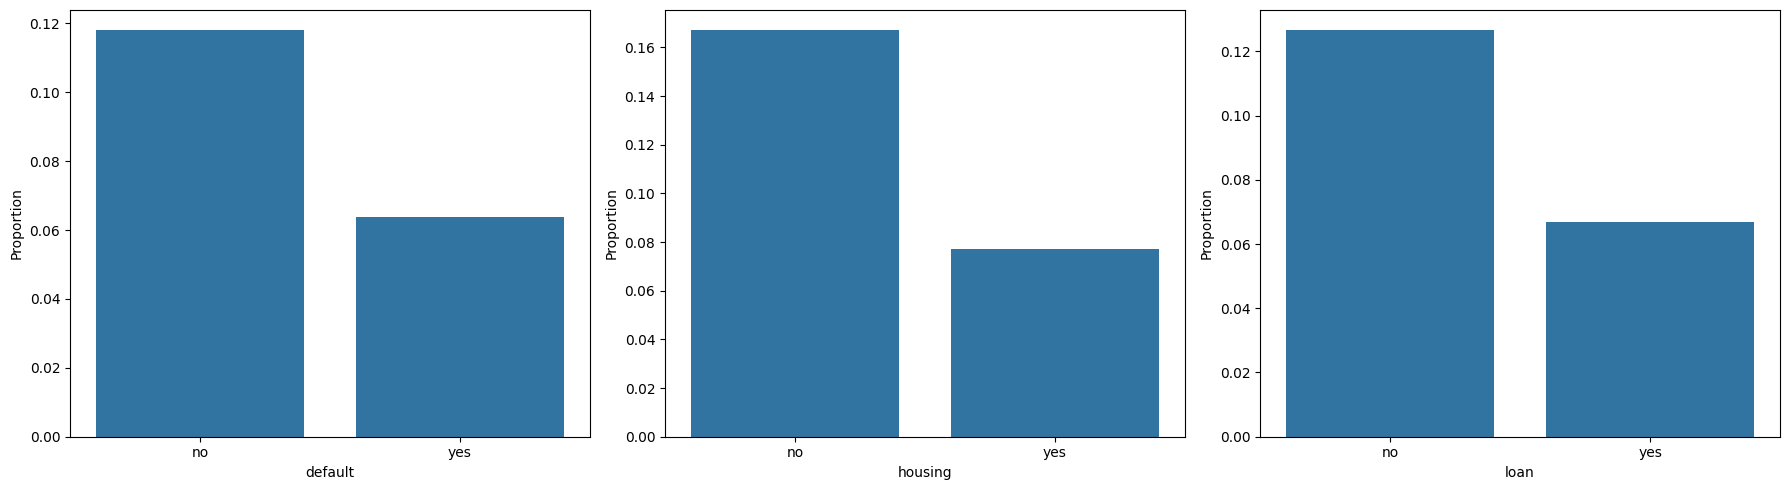

In [54]:
yes_no_cols = ['default', 'housing', 'loan']
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, col, in enumerate(yes_no_cols):
  prop_df = data.groupby(col)["y"].mean().reset_index()
  sns.barplot(x=col, y="y", data=prop_df, ax=axs[i])
  axs[i].set_ylabel("Proportion")
  axs[i].set_xlabel(col)
plt.tight_layout()
plt.show()

## Processing Data

In [ ]:
yes_no_encoder =  OrdinalEncoder(categories=[['no', 'yes'], ['no', 'yes'], ['no', 'yes']])
def encode(data):
  data["job"] = job_encoder.fit_transform(data[["job"]])
  data["marital"] = marital_encoder.fit_transform(data[["marital"]])
  data["education"] = education_encoder.fit_transform(data[["education"]])
  data["contact"] = contact_encoder.fit_transform(data[["contact"]])
  data["month"] = month_encoder.fit_transform(data[["month"]])
  data["poutcome"] = poutcome_encoder.fit_transform(data[["poutcome"]])
  data[yes_no_cols] = yes_no_encoder.fit_transform(data[yes_no_cols])

In [ ]:
encode(data)

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,8.0,0.0,3.0,0.0,2143,1.0,0.0,0.0,5,0.0,261,1,-1,0,0.0,0
1,44,4.0,2.0,1.0,0.0,29,1.0,0.0,0.0,5,0.0,151,1,-1,0,0.0,0
2,33,1.0,0.0,1.0,0.0,2,1.0,1.0,0.0,5,0.0,76,1,-1,0,0.0,0
3,47,0.0,0.0,2.0,0.0,1506,1.0,0.0,0.0,5,0.0,92,1,-1,0,0.0,0
4,33,5.0,2.0,2.0,0.0,1,0.0,0.0,0.0,5,0.0,198,1,-1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4.0,0.0,3.0,0.0,825,0.0,0.0,2.0,17,3.0,977,3,-1,0,0.0,1
45207,71,10.0,1.0,0.0,0.0,1729,0.0,0.0,2.0,17,3.0,456,2,-1,0,0.0,1
45208,72,10.0,0.0,1.0,0.0,5715,0.0,0.0,2.0,17,3.0,1127,5,184,3,3.0,1
45209,57,0.0,0.0,1.0,0.0,668,0.0,0.0,1.0,17,3.0,508,4,-1,0,0.0,0


In [ ]:
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

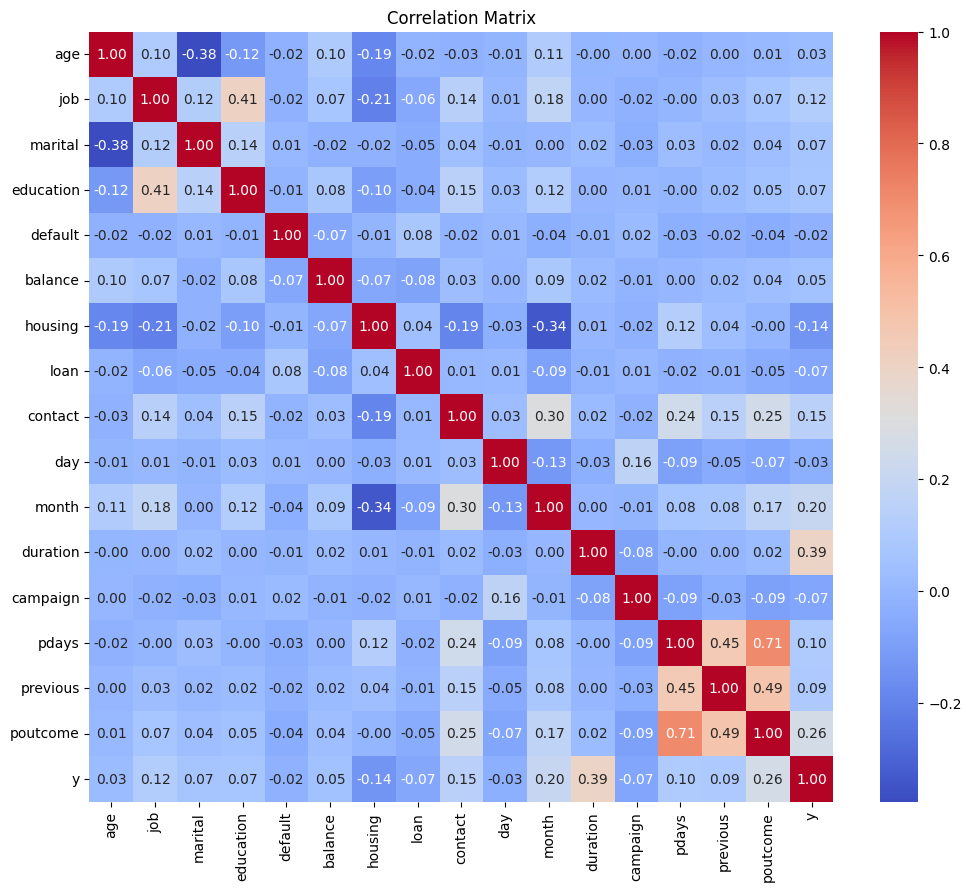

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
X = data.drop(columns=["y"], axis=1, inplace=False)
y = data["y"]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

      Feature       VIF
0         age  8.075689
1         job  3.872281
2     marital  1.646024
3   education  3.526047
4     default  1.029335
5     balance  1.241199
6     housing  2.273554
7        loan  1.210739
8     contact  3.854421
9         day  4.429587
10      month  2.646257
11   duration  1.968772
12   campaign  1.848999
13      pdays  2.558426
14   previous  1.439015
15   poutcome  2.636883


In [ ]:
to_scale = numerical_cols+["job", "marital", "education", "contact", "month", "poutcome"]
to_scale

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job',
 'marital',
 'education',
 'contact',
 'month',
 'poutcome']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[to_scale] = scaler.fit_transform(data[to_scale])

In [ ]:
X = data.drop(columns=["y"], axis=1, inplace=False)
y = data["y"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Testing on Logistic Regression (Baseline)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8973791883224593


## Testing on KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8960521950680084


## Testing on RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9043459029083268


## Testing on XGBoost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9065575583324118


## Testing on LightGBM

In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


[LightGBM] [Info] Number of positive: 4198, number of negative: 31970
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116069 -> initscore=-2.030190
[LightGBM] [Info] Start training from score -2.030190
Accuracy: 0.907110472188433


## Testing on Catboost

In [ ]:
import catboost
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

In [ ]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [ ]:
cat_data = pd.read_csv('bank-full.csv', sep=';')

In [ ]:
X = cat_data.drop(columns=["y"], axis=1, inplace=False)
y = cat_data["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = CatBoostClassifier(
    iterations=500,       # Number of boosting rounds
    learning_rate=0.05,   # Step size shrinkage
    depth=8,              # Depth of each tree
    cat_features=categorical_cols,  # Specify categorical features
    verbose=100,          # Print logs every 100 iterations
    eval_metric='Accuracy'
)

# Train the model
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=100)

0:	learn: 0.8955707	test: 0.8890855	best: 0.8890855 (0)	total: 32.2ms	remaining: 16.1s
100:	learn: 0.9192380	test: 0.9071105	best: 0.9073316 (85)	total: 3.14s	remaining: 12.4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9095432932
bestIteration = 137

Shrink model to first 138 iterations.


In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9095332890953329


## Hyperparameter tuning for XGB

In [ ]:
!nvidia-smi

Tue Feb 25 14:50:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   30C    P0             50W /  400W |     423MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_dist = {
    'max_depth': [3, 5, 7],
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': [100, 500, 1000],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}

model = XGBClassifier(tree_method='hist', device='cuda')
random_search = RandomizedSearchCV(model, param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)
random_search.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.04467293070155442,
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.8}

In [ ]:
best_params = {'colsample_bytree': 1,
 'learning_rate': 0.04467293070155442,
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.8}

In [ ]:
model = XGBClassifier(tree_method = 'hist', device = 'cuda',learning_rate=0.04467293070155442, max_depth=3, n_estimators=500, subsample=0.8, colsample_bytree=1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04467293070155442,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9076633860444543


## Hyperparameter tuning on Catboost

In [ ]:
import optuna
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
data = pd.read_csv('bank-full.csv', sep=';')

In [ ]:
X = cat_data.drop(columns=["y"], axis=1, inplace=False)
y = cat_data["y"]
categorical_cols = X.select_dtypes(include="object").columns.to_list()
numerical_cols = X.select_dtypes(exclude="object").columns.to_list()

In [ ]:
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 500, 2000, step=500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "depth": trial.suggest_int("depth", 4, 12),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 10.0, log=True),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "random_strength": trial.suggest_float("random_strength", 0.1, 10.0),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "task_type": "GPU",
        "eval_metric": "Accuracy",
        "verbose": 0,
        "cat_features":categorical_cols
    }
    X_train, X_val, y_train, y_val = train_test_split(X,
                                                      y, test_size=0.2, random_state=42)
    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=0)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print("Best hyperparameters:", study.best_trial.params)

[I 2025-02-28 18:47:43,235] A new study created in memory with name: no-name-36c92b66-0ba1-479e-adf6-e5fbc572f649
[I 2025-02-28 18:50:40,158] Trial 0 finished with value: 0.9078845515868628 and parameters: {'iterations': 2000, 'learning_rate': 0.052917515694478834, 'depth': 11, 'l2_leaf_reg': 0.010936419666290276, 'border_count': 174, 'bagging_temperature': 0.7263329656340223, 'random_strength': 8.181376221810803, 'boosting_type': 'Ordered'}. Best is trial 0 with value: 0.9078845515868628.
[I 2025-02-28 18:53:08,436] Trial 1 finished with value: 0.9095432931549264 and parameters: {'iterations': 1500, 'learning_rate': 0.02029007530253063, 'depth': 10, 'l2_leaf_reg': 0.02312733154193709, 'border_count': 245, 'bagging_temperature': 0.030371308455854007, 'random_strength': 5.560810304054038, 'boosting_type': 'Ordered'}. Best is trial 1 with value: 0.9095432931549264.
[I 2025-02-28 18:53:15,676] Trial 2 finished with value: 0.9100962070109477 and parameters: {'iterations': 1500, 'learning_r

Best hyperparameters: {'iterations': 1000, 'learning_rate': 0.13713542357476047, 'depth': 7, 'l2_leaf_reg': 0.5103618205574316, 'border_count': 121, 'bagging_temperature': 0.263449342157862, 'random_strength': 7.0806977774826025, 'boosting_type': 'Ordered'}


In [ ]:
params = {'iterations': 1000, 'learning_rate': 0.13713542357476047, 'depth': 7, 'l2_leaf_reg': 0.5103618205574316, 'border_count': 121, 'bagging_temperature': 0.263449342157862, 'random_strength': 7.0806977774826025, 'boosting_type': 'Ordered',         "task_type": "GPU",
        "eval_metric": "Accuracy",
        "verbose": 0,
        "cat_features":categorical_cols}
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = CatBoostClassifier(**params)
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=0)
y_pred = model.predict(X_val)
accuracy_score(y_val, y_pred)

0.9134136901470751